<a href="https://colab.research.google.com/github/octet07/task3/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
import numpy as np

In [3]:
df=pd.read_csv('/content/drive/MyDrive/AIML/day4/titanic.csv')

1. Basic pre processing of the data set


In [5]:
df.shape

(891, 12)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
print("Null values after preprocessing:\n", df.isnull().sum())

Null values after preprocessing:
 Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


2. Split data into train-test sets.

In [13]:
from sklearn.preprocessing import LabelEncoder
label_enc = LabelEncoder()
df['Sex'] = label_enc.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = label_enc.fit_transform(df['Embarked'])

In [14]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (712, 7)
Testing data shape: (179, 7)


3. Fit a Linear Regression model using sklearn.linear_model.

In [16]:
#using linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

# Since this is a classification problem, clip predictions to 0 or 1 for evaluation
y_pred_class = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Mean Squared Error: 0.1351938212761502
R² Score: 0.4425038317234068


In [17]:
#using logistic regression for classification

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test data
y_pred = log_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8100558659217877

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



4. Evaluate model using MAE, MSE, R².

In [19]:
from sklearn.linear_model import LinearRegression

# Initialize and fit model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predict on test set
y_pred = lin_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Evaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Linear Regression Evaluation Metrics:
Mean Absolute Error (MAE): 0.28552309459008085
Mean Squared Error (MSE): 0.1351938212761502
R² Score: 0.4425038317234068


5.Plot regression line and interpret coefficients.

In [20]:
# Create a DataFrame for feature coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lin_model.coef_
})

# Sort by absolute coefficient value
coef_df = coef_df.reindex(coef_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display
print("Linear Regression Coefficients:")
print(coef_df)


Linear Regression Coefficients:
    Feature  Coefficient
1       Sex    -0.514607
0    Pclass    -0.153578
3     SibSp    -0.038734
6  Embarked    -0.036714
4     Parch    -0.020048
2       Age    -0.004685
5      Fare     0.000355


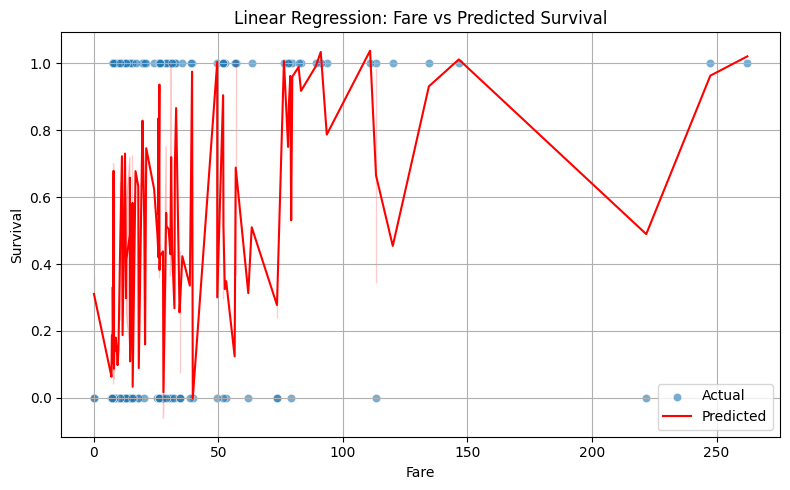

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use 'Fare' for plotting
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test['Fare'], y=y_test, label='Actual', alpha=0.6)
sns.lineplot(x=X_test['Fare'], y=y_pred, color='red', label='Predicted')
plt.xlabel('Fare')
plt.ylabel('Survival')
plt.title('Linear Regression: Fare vs Predicted Survival')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
